In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
from isothermal_func import *
import scipy.integrate as integrate
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

In [2]:
cbarx = 0.141
cbheight = 0.02
cbary = 0.9
cblen = 0.35
dx1 = 0.4


In [3]:
f_diss = 0.1
X = 0.74 
F0 = 2.1e7
G0 = 2. * f_diss * F0 * mp/X
r0 = 250. * pc
v0 = 170. * kmps
t0 = r0/v0
Mach = 1.e3
Sigma0        = 52.*Msun_pcsq
rmax = 10. * kpc
tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

# Intermediate Area

In [26]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-11, 7., 20) #xi = np.log(t0*G0/Sigma0)

a = 40.

dMassFluxHI_Int = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot_Int = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10.
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi

        
        dMassFluxHI_Int[i,j] = integrate.dblquad(IsodMassFlux_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma, xi1, Mach, 1))[0]
        dMassFluxtot_Int[i,j] = integrate.quad(IsodMassFlux_tot, xlow, xhigh,   \
                                            args=(gamma,  Mach, 1))[0]

        
        
        j+=1
    print(i)        
    i+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [27]:
dMassFlux_Int = dMassFluxHI_Int/dMassFluxtot_Int
IsoFH2_flux_Int = 1. - dMassFlux_Int
IsoFH2_flux_Int[IsoFH2_flux_Int<0.0] = 0.0
IsoFH2_flux_Int[IsoFH2_flux_Int>1.0] = 1.0
np.amax(IsoFH2_flux_Int),np.amin(IsoFH2_flux_Int)

(0.9999999999975289, 0.0)

In [28]:
IsoFH2_flux_Int

array([[0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99999992, 0.99999995, 0.99999997, 0.99999998, 0.99999999,
        0.99999999, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99999928, 0.99999955, 0.99999972, 0.99999983, 0.99999989,
        0.99999993, 0.99999996, 0.99999997, 0.99999998, 0.99999999,
        0.99999999, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99999362, 0.99999605, 0.99999754, 0.99999847, 0.99999905,
        0.99999941, 0.99999963, 0.99999977, 0.99999985, 0.99999991,
        0.99999994, 0.99999996, 0.99999998, 0

In [30]:
Gamma = np.logspace(-2, 2., 100)
xi_arr = np.linspace(-11, 7., 100) #xi = np.log(t0*G0/Sigma0)


a = 40.

dMassFluxHI_Int = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot_Int = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi

        dMassFluxHI_Int[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi1, Mach, 1))[0]

        dMassFluxtot_Int[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma, Mach, 1))[0] 

        
        
        j+=1
            
    i+=1
dMassFlux_Int = dMassFluxHI_Int/dMassFluxtot_Int
FH2_flux_Int = 1. - dMassFlux_Int
FH2_flux_Int[FH2_flux_Int<0.0] = 0.0
np.amax(FH2_flux_Int),np.amin(FH2_flux_Int)

(0.9999999999999916, 0.0)

# Constnat Solid Angle

In [46]:
Gamma = np.logspace(-2, 2., 50)
xi_arr = np.linspace(-11, 7., 50) #xi = np.log(t0*G0/Sigma0)

sat_rate = 1./sat_time

a = rmax/r0

dMassFluxHI_SA = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot_SA = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi

        dMassFluxHI_SA[i,j] = integrate.quad(IsodMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi1, Mach, 2))[0]

        dMassFluxtot_SA[i,j] = integrate.quad(IsodMassFlux_tot, xlow, xhigh,  \
                                            args=(gamma,  Mach, 2))[0] 
        
        
        j+=1
            
    i+=1

dMassFlux_SA = dMassFluxHI_SA/dMassFluxtot_SA
IsoFH2_flux_SA = 1. - dMassFlux_SA
IsoFH2_flux_SA[IsoFH2_flux_SA<0.0] = 0.0
IsoFH2_flux_SA[IsoFH2_flux_SA>1.0] = 1.0
np.amax(IsoFH2_flux_SA),np.amin(IsoFH2_flux_SA)

(0.999999999999897, 0.0)

In [45]:
Gamma = np.logspace(-2, 2., 50)
xi_arr = np.linspace(-11, 7., 50) #xi = np.log(t0*G0/Sigma0)

a = 40.

dMassFluxHI_SA = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot_SA = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi

        dMassFluxHI_SA[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi1, Mach, 2))[0]

        dMassFluxtot_SA[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, 2))[0] 

        
        
        j+=1
            
    i+=1

dMassFlux_SA = dMassFluxHI_SA/dMassFluxtot_SA
FH2_flux_SA = 1. - dMassFlux_SA
FH2_flux_SA[FH2_flux_SA<0.0] = 0.0
np.amax(FH2_flux_SA),np.amin(FH2_flux_SA)

(0.9999999999998972, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


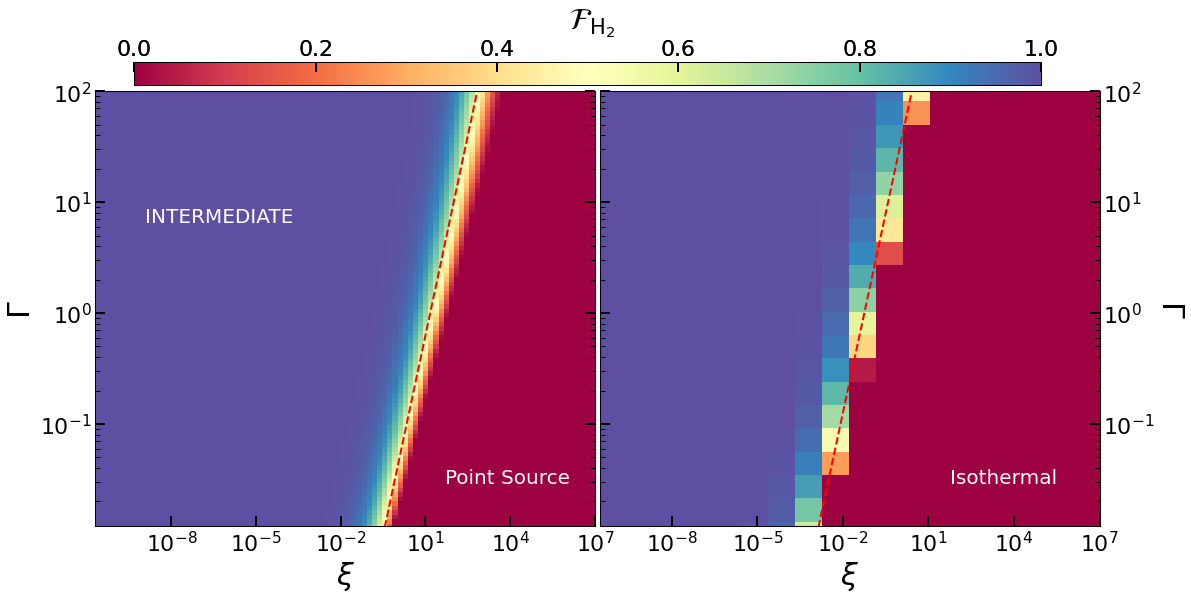

In [38]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(18,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)


Gamma = np.logspace(-2, 2., 100)
xi_arr = np.linspace(-11, 7., 100) #xi = np.log(t0*G0/Sigma0)


plot = ax[0].pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux_Int),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax[0].set_xlim(2.e-11, 1.e7)
ax[0].set_ylim(1.2e-2, 1.e2)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\xi$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-11, 7., 20) #xi = np.log(t0*G0/Sigma0)


plot = ax[1].pcolormesh(10.**xi_arr, Gamma, np.transpose(IsoFH2_flux_Int),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[1].set_xlim(3.e-11, 1.e7)
ax[1].set_ylim(1.2e-2, 1.e2)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\xi$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

# ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
# ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)

slope = 1.2
yy =  ( xi_arr * slope -1.4) 
ax[0].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)


slope = 1.2
yy =  ( xi_arr * slope +1.5) 
ax[1].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)
# ax[0].legend(loc='lower right', fontsize="30")



# for i in range(xi_data.shape[0]):
#     if(galtype[i]=='Starburst'):
#         if(i==3):
#             ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='12',label='Starburst')
#         else:
#             ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
#             ax[1].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
#     else:
#         if(i==16):
#             ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
#             ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7,\
#                        label='Non-SB')
#         else:
#             ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.5)
#             ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.5)

ax[0].legend(loc='upper left', fontsize="24", frameon=False)
ax[1].legend(loc='upper left', fontsize="24", frameon=False)

ax[0].text(0.1, 0.7,'INTERMEDIATE', transform=ax[0].transAxes, color='white', fontsize=20)
ax[0].text(0.7, 0.1,'Point Source', transform=ax[0].transAxes, color='white', fontsize=20)
ax[1].text(0.7, 0.1,'Isothermal', transform=ax[1].transAxes, color='white', fontsize=20)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals_SA_int.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


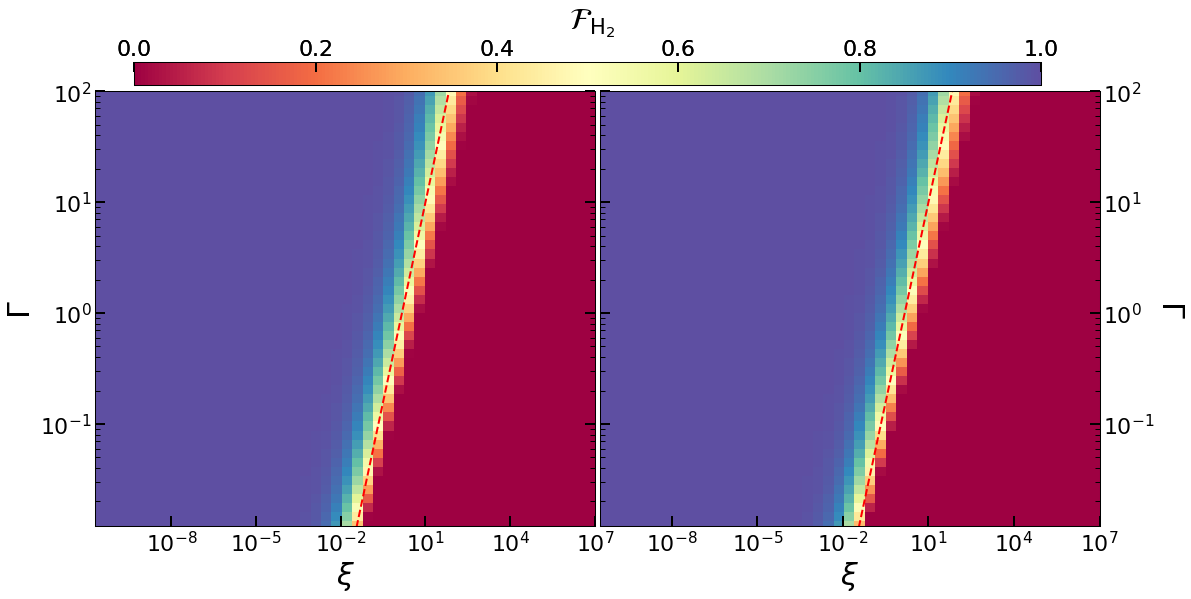

In [47]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(18,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)


Gamma = np.logspace(-2, 2., 50)
xi_arr = np.linspace(-11, 7., 50) #xi = np.log(t0*G0/Sigma0)

plot = ax[0].pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux_SA),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax[0].set_xlim(2.e-11, 1.e7)
ax[0].set_ylim(1.2e-2, 1.e2)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\xi$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)


Gamma = np.logspace(-2, 2., 50)
xi_arr = np.linspace(-11, 7., 50) #xi = np.log(t0*G0/Sigma0)

plot = ax[1].pcolormesh(10.**xi_arr, Gamma, np.transpose((IsoFH2_flux_SA)),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[1].set_xlim(3.e-11, 1.e7)
ax[1].set_ylim(1.2e-2, 1.e2)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\xi$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

# ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
# ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)


slope = 1.2
yy =  ( xi_arr * slope -0.2) 
ax[1].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)
# ax[0].legend(loc='lower right', fontsize="30")

slope = 1.2
yy =  ( xi_arr * slope -0.2) 
ax[0].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)



# for i in range(xi_data.shape[0]):
#     if(galtype[i]=='Starburst'):
#         if(i==3):
#             ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='12',label='Starburst')
#         else:
#             ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
#             ax[1].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
#     else:
#         if(i==16):
#             ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
#             ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7,\
#                        label='Non-SB')
#         else:
#             ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.5)
#             ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.5)

ax[0].legend(loc='upper left', fontsize="24", frameon=False)
ax[1].legend(loc='upper left', fontsize="24", frameon=False)

# ax[0].text(0.7, 0.1,'Intermediate', transform=ax[0].transAxes, color='white', fontsize=20)
# ax[1].text(0.7, 0.1,'Solid Angle', transform=ax[1].transAxes, color='white', fontsize=20)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals_SA_int.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )
